## 2. 모델 저장하고 불러오기

### 2.1 save() 함수를 이용한 모델 저장하기

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(360, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, batch_size=100, epochs=5, verbose=1)
model.save('mnist_keras_model.h5')

Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 1.0921 - accuracy: 0.7106
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.4704 - accuracy: 0.8689
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.3798 - accuracy: 0.8924
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.3358 - accuracy: 0.9040
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.3056 - accuracy: 0.9118


### 2.2 모델의 구조 저장하기

In [7]:
# 모델의 구조만 저장
model_json = model.to_json()
with open('mnist_model.json', 'w') as f:
    f.write(model_json)

In [8]:
# 모델 구조 불러오기
with open('mnist_model.json', 'r') as f:
    model_json = f.read()

from tensorflow.keras.models import model_from_json
model = model_from_json(model_json)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 360)               282600    
                                                                 
 dense_3 (Dense)             (None, 128)               46208     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 330,098
Trainable params: 330,098
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 구조 있는 상태에서 가중치만 불러오기
model.load_weights('mnist_keras_model.h5')
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.9285


[0.2500655949115753, 0.9284999966621399]

### 2.3 모델의 구조와 가중치 불러오기

In [10]:
from tensorflow.keras.models import load_model
model = load_model('mnist_keras_model.h5')

In [11]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(train_X, train_y),(test_X, test_y) = mnist.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

import numpy as np
pred = np.argmax(model.predict(test_X), axis=1)
np.mean(np.equal(test_y, pred))

0.9285

## 3. 콜백을 이용한 딥러닝 모형 관리 및 모니터링

### 3.1 모델 자동 저장 콜백 - ModelCheckPoint

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

path = 'model_dataset/model-{epoch:02d}-{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(filepath=path, monitor='val_accuracy', save_best_only=True, verbose=1)

model.fit(train_X, train_y, validation_split=0.2, batch_size=1000, epochs=50, callbacks=[checkpoint], verbose=1)

Epoch 1/50
47/48 [============================>.] - ETA: 0s - loss: 0.2271 - accuracy: 0.9345
Epoch 00001: val_accuracy improved from -inf to 0.94517, saving model to model_dataset\model-01-0.9452.h5
48/48 [==============================] - 1s 21ms/step - loss: 0.2266 - accuracy: 0.9345 - val_loss: 0.1921 - val_accuracy: 0.9452
Epoch 2/50
44/48 [==========================>...] - ETA: 0s - loss: 0.2240 - accuracy: 0.9362
Epoch 00002: val_accuracy improved from 0.94517 to 0.94533, saving model to model_dataset\model-02-0.9453.h5
48/48 [==============================] - 1s 20ms/step - loss: 0.2243 - accuracy: 0.9363 - val_loss: 0.1912 - val_accuracy: 0.9453
Epoch 3/50
46/48 [===========================>..] - ETA: 0s - loss: 0.2273 - accuracy: 0.9357
Epoch 00003: val_accuracy improved from 0.94533 to 0.94542, saving model to model_dataset\model-03-0.9454.h5
48/48 [==============================] - 1s 16ms/step - loss: 0.2265 - accuracy: 0.9359 - val_loss: 0.1905 - val_accuracy: 0.9454
Epoc

### 3.2 조기 종료 콜백 - EarlyStopping

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)
model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=1000,
          epochs=1000, callbacks=[early_stopping], verbose=1)

# val_accuracy가 3회이상 증가 안하면 조기종료

Epoch 1/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.1876 - accuracy: 0.9462 - val_loss: 0.1667 - val_accuracy: 0.9490
Epoch 2/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.1852 - accuracy: 0.9468 - val_loss: 0.1662 - val_accuracy: 0.9496
Epoch 3/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.1863 - accuracy: 0.9467 - val_loss: 0.1654 - val_accuracy: 0.9501
Epoch 4/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.1850 - accuracy: 0.9463 - val_loss: 0.1648 - val_accuracy: 0.9504
Epoch 5/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.1835 - accuracy: 0.9467 - val_loss: 0.1642 - val_accuracy: 0.9503
Epoch 6/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.1834 - accuracy: 0.9478 - val_loss: 0.1636 - val_accuracy: 0.9511
Epoch 7/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.1834 - accuracy: 0.9469 - val_loss: 0.1629 - val_accuracy: 0.9508

### 3.3 학습 시각화 콜백 - Tensorboard

In [15]:
# 모델 학습 시 loss, accuracy, 레이어별 활성화 함수의 출력값 등을 시각화시켜줌
from tensorflow.keras.callbacks import TensorBoard
tensor_board = TensorBoard(log_dir='tensor_log', embeddings_freq=1, histogram_freq=1)

model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=1000,
          epochs=100, callbacks=[tensor_board], verbose=1)

Epoch 1/100
60/60 [==============================] - 1s 20ms/step - loss: 0.1642 - accuracy: 0.9531 - val_loss: 0.1485 - val_accuracy: 0.9544
Epoch 2/100
60/60 [==============================] - 1s 18ms/step - loss: 0.1645 - accuracy: 0.9530 - val_loss: 0.1479 - val_accuracy: 0.9553
Epoch 3/100
60/60 [==============================] - 1s 17ms/step - loss: 0.1643 - accuracy: 0.9528 - val_loss: 0.1476 - val_accuracy: 0.9552
Epoch 4/100
60/60 [==============================] - 1s 17ms/step - loss: 0.1626 - accuracy: 0.9534 - val_loss: 0.1471 - val_accuracy: 0.9552
Epoch 5/100
60/60 [==============================] - 1s 17ms/step - loss: 0.1622 - accuracy: 0.9533 - val_loss: 0.1468 - val_accuracy: 0.9557
Epoch 6/100
60/60 [==============================] - 1s 16ms/step - loss: 0.1619 - accuracy: 0.9535 - val_loss: 0.1461 - val_accuracy: 0.9549
Epoch 7/100
60/60 [==============================] - 1s 18ms/step - loss: 0.1628 - accuracy: 0.9530 - val_loss: 0.1457 - val_accuracy: 0.9554
Epoch 

In [1]:
# mnist dataset dnn training
# using checkpoint, early stopping, tensorboard callback
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_X, train_y),(test_X, test_y) = mnist.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

from tensorflow.keras.callbacks import ModelCheckpoint
path = 'mnist_keras_model.h5'
checkpoint = ModelCheckpoint(filepath=path, monitor='val_accuracy', save_best_only=True, verbose=1)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_accuracy', patience=3)

from tensorflow.keras.callbacks import TensorBoard
tensor_board = TensorBoard(log_dir="tensor_log", embeddings_freq=1, histogram_freq=1)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(360, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_X, train_y, validation_split=0.2, batch_size=1000, epochs=1000,
          callbacks=[checkpoint, early_stopping, tensor_board])

Epoch 1/1000
44/48 [==========================>...] - ETA: 0s - loss: 2.1655 - accuracy: 0.2490
Epoch 00001: val_accuracy improved from -inf to 0.54600, saving model to mnist_keras_model.h5
48/48 [==============================] - 2s 23ms/step - loss: 2.1500 - accuracy: 0.2662 - val_loss: 1.9479 - val_accuracy: 0.5460
Epoch 2/1000
47/48 [============================>.] - ETA: 0s - loss: 1.8008 - accuracy: 0.5463
Epoch 00002: val_accuracy improved from 0.54600 to 0.67858, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 18ms/step - loss: 1.7975 - accuracy: 0.5476 - val_loss: 1.5937 - val_accuracy: 0.6786
Epoch 3/1000
48/48 [==============================] - ETA: 0s - loss: 1.4784 - accuracy: 0.6454
Epoch 00003: val_accuracy improved from 0.67858 to 0.74325, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 19ms/step - loss: 1.4784 - accuracy: 0.6454 - val_loss: 1.2810 - val_accuracy: 0.7433
Epoch 4/1000
46/48 [==============

## 4. 케라스를 이용한 와인데이터 분류용 DNN 구현

### 4.1 와인 데이터

### 4.2 케라스를 이용한 DNN 모델

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd

redwine = pd.read_csv('winequality-red.csv', sep=';')
redwine_X = redwine.iloc[:, :-1]
redwine_y = redwine.iloc[:, -1] - 3
redwine_y.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(redwine_X, redwine_y, test_size=0.3)

model = Sequential()

model.add(Dense(100, input_shape=(11,), activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_y.to_numpy(), batch_size=200, epochs=300)

Epoch 1/300
6/6 [==============================] - 1s 7ms/step - loss: 1.6473 - accuracy: 0.3021
Epoch 2/300
6/6 [==============================] - 0s 6ms/step - loss: 1.2787 - accuracy: 0.4316
Epoch 3/300
6/6 [==============================] - 0s 7ms/step - loss: 1.2597 - accuracy: 0.4155
Epoch 4/300
6/6 [==============================] - 0s 6ms/step - loss: 1.2358 - accuracy: 0.4406
Epoch 5/300
6/6 [==============================] - 0s 6ms/step - loss: 1.2121 - accuracy: 0.4415
Epoch 6/300
6/6 [==============================] - 0s 7ms/step - loss: 1.1990 - accuracy: 0.4692
Epoch 7/300
6/6 [==============================] - 0s 5ms/step - loss: 1.2050 - accuracy: 0.4352
Epoch 8/300
6/6 [==============================] - 0s 5ms/step - loss: 1.1999 - accuracy: 0.4656
Epoch 9/300
6/6 [==============================] - 0s 6ms/step - loss: 1.1778 - accuracy: 0.4745
Epoch 10/300
6/6 [==============================] - 0s 5ms/step - loss: 1.1634 - accuracy: 0.4656
Epoch 11/300
6/6 [===========

In [11]:
model.evaluate(test_X, test_y)

15/15 [==============================] - 0s 2ms/step - loss: 0.9312 - accuracy: 0.6000


[0.9311954379081726, 0.6000000238418579]

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

### 4.3 학습 과정 시각화

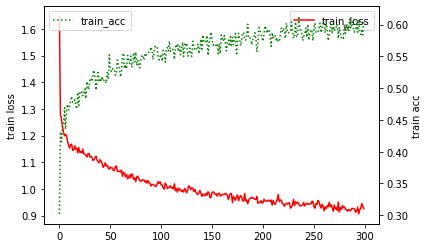

In [12]:
# 학습 시 loss와 accuracy 변화 시각화
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(history.history['loss'], 'r-', label='train_loss')
ax1.set_ylabel('train loss')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], 'g:', label='train_acc')
ax2.set_ylabel('train acc')
ax2.legend()

plt.show()